In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\archive (6)\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
y=data['target']
x=data.drop('target',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=44)
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)
model=svm.SVC(kernel='rbf')
p=model.fit(xtrain_scaled,ytrain)
xt=p.predict(xtest_scaled)
print("accuracy score:",accuracy_score(ytest,xt)*100)
print("classification report:\n",classification_report(ytest,xt))

accuracy score: 88.63636363636364
classification report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       158
           1       0.86      0.91      0.89       150

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



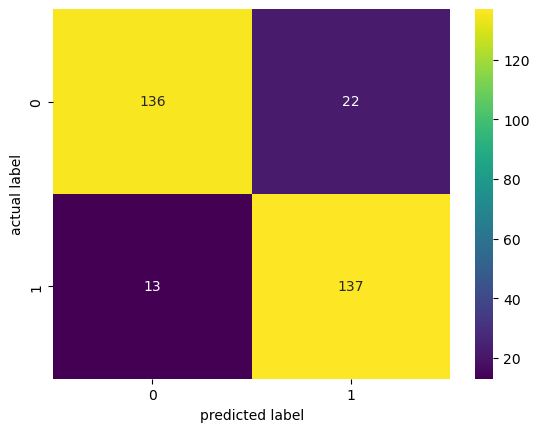

In [6]:
conf_matrix=confusion_matrix(ytest,xt)
sn.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

In [16]:
new=np.array([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])
new_c=scaler.transform(new)
xt1=p.predict(new_c)
print("heart disease" if xt1[0]==1 else "no heart disease")

no heart disease


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
